# 1D Wasserstein barycenter demo

In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter

### Dataset Generation

In [2]:
n=100 # nb bins

# bin positions
x=np.arange(n,dtype=np.float64)

# Gaussian distributions
a1=ot.datasets.get_1D_gauss(n,m=20,s=5) # m= mean, s= std
a2=ot.datasets.get_1D_gauss(n,m=60,s=8)

# creating matrix A containing all distributions
A=np.vstack((a1,a2)).T
nbd=A.shape[1]

# loss matrix + normalization
M=ot.utils.dist0(n)
M/=M.max()

### Plot distributions

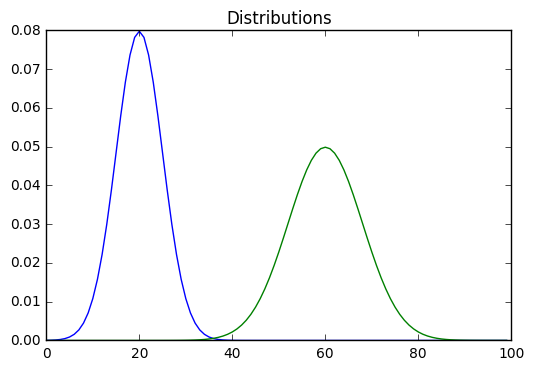

In [3]:
pl.figure(1)
for i in range(nbd):
    pl.plot(x,A[:,i])
pl.title('Distributions')
pl.show()


### Barycenter computation (for l2 and Wasserstein)

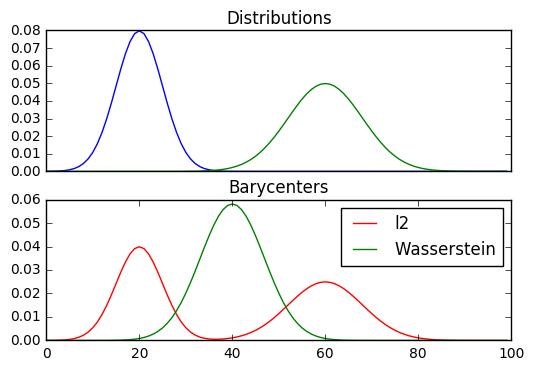

In [4]:
# l2bary
bary_l2=A.mean(1)

# wasserstein
reg=1e-3
bary_wass=ot.bregman.barycenter(A,M,reg)

pl.figure(2)
pl.clf()
pl.subplot(2,1,1)
for i in range(nbd):
    pl.plot(x,A[:,i])
pl.title('Distributions')
pl.xticks([])

pl.subplot(2,1,2)
pl.plot(x,bary_l2,'r',label='l2')
pl.plot(x,bary_wass,'g',label='Wasserstein')
pl.legend()
pl.title('Barycenters')

pl.show()

## Barycenter interpolation

In [5]:

nbalpha=11
alphalist=np.linspace(0,1,nbalpha)


B_l2=np.zeros((n,nbalpha))

B_wass=np.copy(B_l2)

for i in range(0,nbalpha):
    alpha=alphalist[i]
    weights=np.array([1-alpha,alpha])
    B_l2[:,i]=A.dot(weights)
    B_wass[:,i]=ot.bregman.barycenter(A,M,reg,weights)


## Plot interpolation

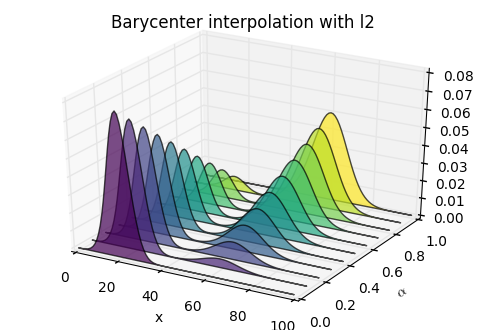

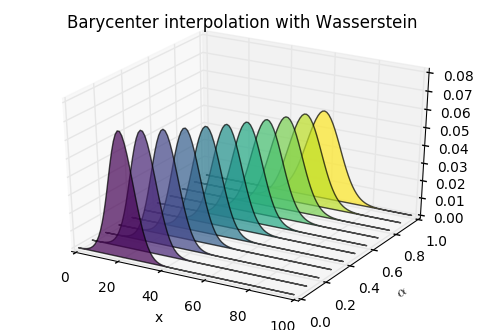

In [6]:

pl.figure(3)

#pl.subplot(1,2,1)
cmap=pl.cm.get_cmap('viridis')
verts = []
zs = alphalist
for i,z in enumerate(zs):
    ys = B_l2[:,i]
    verts.append(list(zip(x, ys)))

ax = pl.gcf().gca(projection='3d')

poly = PolyCollection(verts,facecolors=[cmap(a) for a in alphalist])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('x')
ax.set_xlim3d(0, n)
ax.set_ylabel('$\\alpha$')
ax.set_ylim3d(0,1)
ax.set_zlabel('')
ax.set_zlim3d(0, B_l2.max()*1.01)
pl.title('Barycenter interpolation with l2')

pl.show()

pl.figure(4)

#pl.subplot(1,2,1)
cmap=pl.cm.get_cmap('viridis')
verts = []
zs = alphalist
for i,z in enumerate(zs):
    ys = B_wass[:,i]
    verts.append(list(zip(x, ys)))

ax = pl.gcf().gca(projection='3d')

poly = PolyCollection(verts,facecolors=[cmap(a) for a in alphalist])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('x')
ax.set_xlim3d(0, n)
ax.set_ylabel('$\\alpha$')
ax.set_ylim3d(0,1)
ax.set_zlabel('')
ax.set_zlim3d(0, B_l2.max()*1.01)
pl.title('Barycenter interpolation with Wasserstein')

pl.show()